In [1]:
from pathlib import Path
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
from astropy import units
import glob

In [2]:
datapath = Path("../data/tr14/")

In [3]:
ff = datapath / "icct01i3q_flt.fits"

In [4]:
hdulist = fits.open(ff)

In [5]:
print('\n'.join([i.__repr__() for i in hdulist]))

In [50]:
hdu = hdulist[0]
hdr = hdu.header
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2019-12-30' / date this file was written (yyyy-mm-dd)                
NEXTEND =                   13 / Number of standard extensions                  
FILENAME= 'icct01i3q_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [11]:
for hdu in hdulist[1:]:
    print(hdu.header['EXTNAME'])

SCI
ERR
DQ
SAMP
TIME
HDRLET
HDRLET
HDRLET
HDRLET
HDRLET
WCSCORR
HDRLET
HDRLET


In [7]:
hdu.data

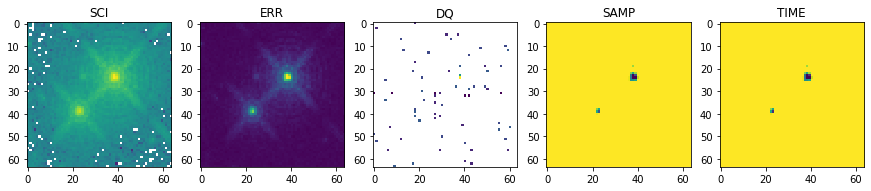

In [8]:
img = hdulist[i].data
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in np.arange(0, 5):
    axes[i].imshow(hdulist[i+1].data, norm=mpl.colors.LogNorm())
    axes[i].set_title(hdulist[i+1].header['EXTNAME'])
# plt.colorbar()
# plt.title(hdr['EXTNAME'])

In [9]:
hdulist.close()

# Check all the images

In [10]:
filenames = list(datapath.glob("i*fits"))

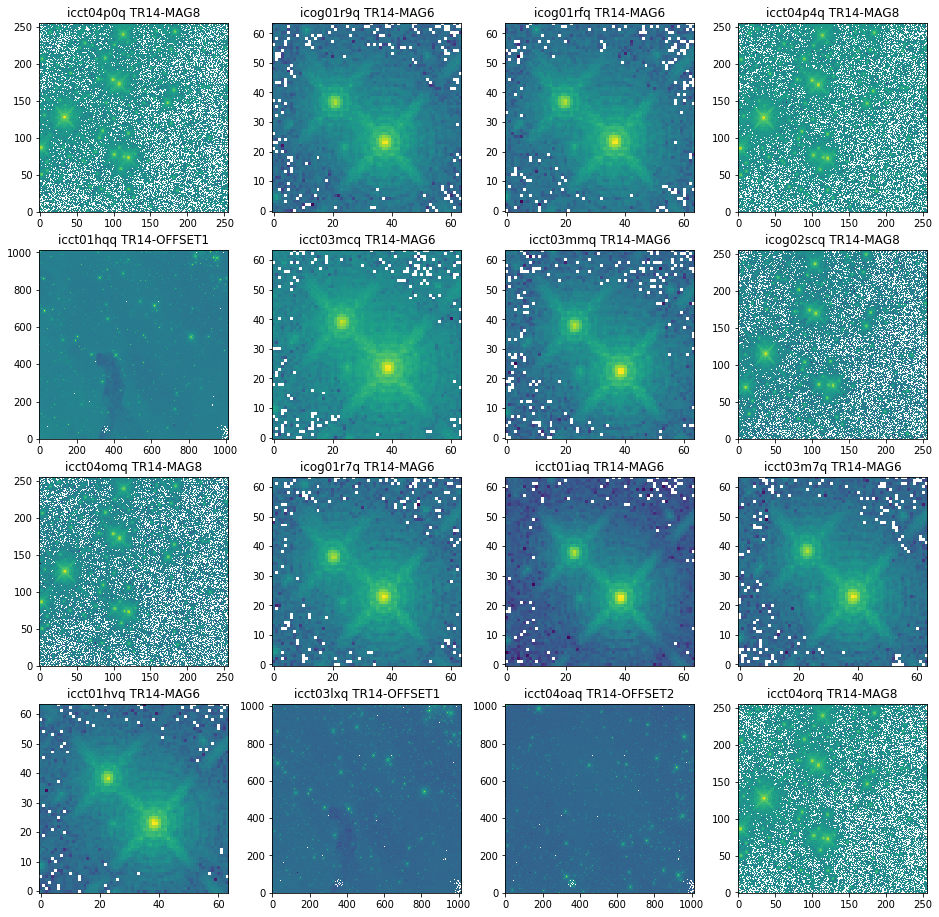

In [11]:
# pick 16 images at random
nplots = 16
nimages = len(filenames)
nimg_ind = np.arange(nimages)
if True: # toggle random order
    np.random.shuffle(nimg_ind)
img_ind = nimg_ind[:nplots]

shape = (4, 4)
fig, axes = plt.subplots(*shape, figsize=(16, 16))
for i, ax in enumerate(axes.ravel()):
    ff = filenames[img_ind[i]]
    hdulist = fits.open(ff)
    hdr = hdulist[0].header
    img = hdulist[1].data
    ax.imshow(img, norm=mpl.colors.LogNorm(), origin='lower')
    ax.set_title(hdr['ROOTNAME'] + ' ' + hdr['TARGNAME'])
    hdulist.close()

# Quick calc of the separation of a 1500 day companion to a 15 Msol star

In [12]:
from astropy import constants as const

In [13]:
G = const.G.to(units.AU**3 * units.Msun**-1 * units.year**-2)
M0 = 15 * units.Msun
T_max = 1500 * units.day.to(units.year) * units.year
def calc_sep(M0 = 15 * units.Msun, T=T_max):
    R = (T**2 * (G * M0)/(4*np.pi**2))**(1/3.)
    return R
max_sep = calc_sep()

In [14]:
tr14_dist = 2700 * units.parsec
max_sep / tr14_dist

def au2arcsec(sep, dist=tr14_dist):
    """
    Convert separation in AU to arcsec given a distance in pc
    """
    conv_units = units.AU / units.arcsec / units.pc
    arcsec = sep / dist / conv_units
    return arcsec

au2arcsec(max_sep, tr14_dist).to(units.mas)


<Quantity 2.34240441 mas>

#  Full-field image 

In [51]:
ff = filenames[7]

NameError: name 'filenames' is not defined

In [16]:
hdulist = fits.open(ff)
hdulist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x12099ac50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1215ad8d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1215a2ef0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1215b16d8>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1215a9400>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1215a9fd0>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1215ab7f0>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1215abef0>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1215b6630>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1215b6d30>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1215b8470>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1215bb588>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1215bbda0>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1215be4e0>]

In [17]:
hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2019-12-30' / date this file was written (yyyy-mm-dd)                
NEXTEND =                   13 / Number of standard extensions                  
FILENAME= 'icct02jfq_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [18]:
data = hdulist[1].data#[200:400,200:400]

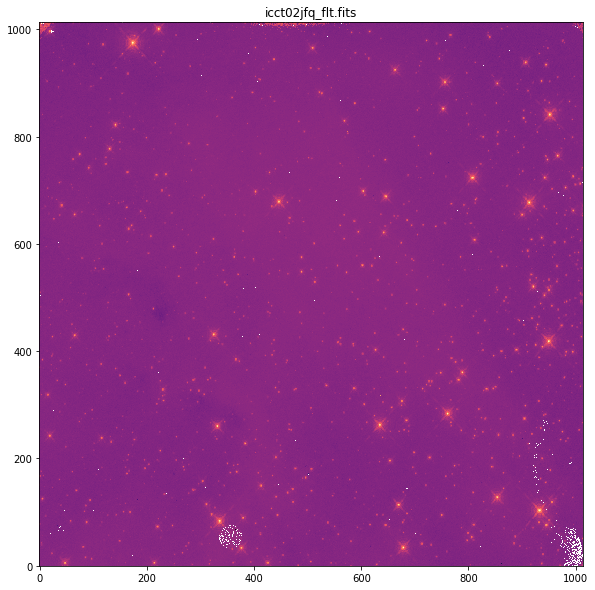

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
imax = ax.imshow(data, origin='lower', 
                 cmap=mpl.cm.magma,
                 norm=mpl.colors.LogNorm())
ax.set_title(ff.name);
if True:
    fig.savefig('figs/' + ff.stem + '.png', bbox_inches='tight')

# Source detection

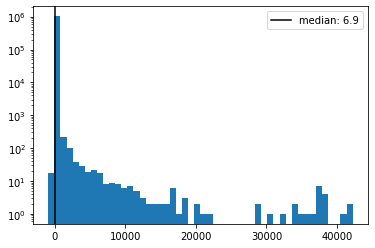

In [20]:
# First, let's look at a histogram
fig, ax = plt.subplots(1, 1)
ax.hist(data.ravel(), bins=50, log=True);
ax.axvline(np.median(data), c='k', label='median: {0:0.1f}'.format(np.median(data)))
ax.legend()

In [21]:
import photutils
from astropy.stats import sigma_clipped_stats

In [22]:
mean, median, std = sigma_clipped_stats(data, sigma=2.0)  

In [23]:
print(mean, median, std)

6.818903 6.770411 0.97243106


In [24]:
from photutils import DAOStarFinder

In [25]:
ff

PosixPath('../data/tr14/icct02jfq_flt.fits')

In [56]:
daofind = DAOStarFinder(fwhm=1.5, threshold=5.*std, brightest=10000)
sources = daofind(data - median).to_pandas()

In [57]:
sources.shape

(2012, 11)

In [58]:
plot_sources = sources.query("flux <= flux.max()")

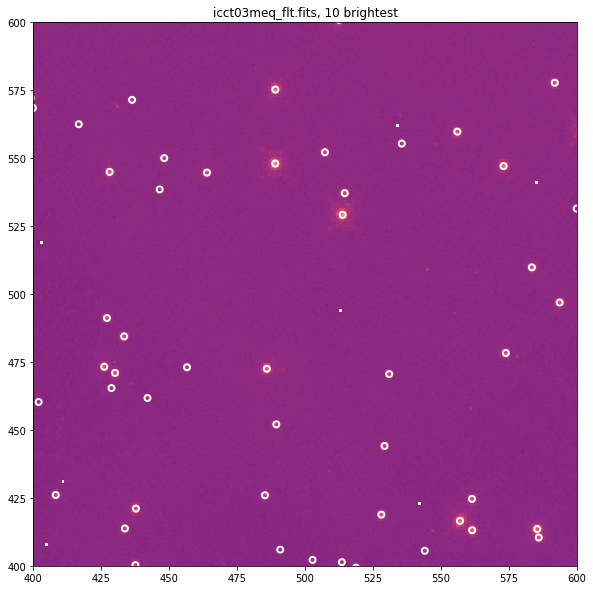

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(data, origin='lower',
          norm=mpl.colors.LogNorm(),
          cmap=mpl.cm.magma)
ax.scatter(plot_sources['xcentroid'], 
           plot_sources['ycentroid'], 
           ec='w', lw=2, fc='none')
ax.set_xlim(400, 600)#(0, data.shape[1])
ax.set_ylim(400, 600)#(0, data.shape[0])
ax.set_title(ff.name + ', 10 brightest');
ax.set_aspect('equal')
if False:
    fig.savefig('figs/' + ff.stem + '-brightest10.png', bbox_inches='tight')

In [30]:
hdulist.close()

# giovanni's database

ff = "/user/jaguilar/WFC3_NGC1976_df.hdf"

df = pd.read_hdf(ff, 'StrampelliWFC32019')

store = pd.HDFStore(ff)

keys = store.keys()
print('\n'.join([f'{str(i)} {k}' for i, k in enumerate(keys)]))

i = 6
print(keys[i])
store.get(keys[i])

# Get all the proposal ID numbers

In [31]:
info = {}
for i, ff in enumerate(filenames):
    hdulist = fits.open(ff)
    hdr = hdulist[0].header
    rootname = hdr['ROOTNAME']
    subtype = hdr['SUBTYPE']
    filt = hdr['FILTER']
    exptime = hdr['EXPTIME']
    info[i] = {'ROOTNAME':rootname,
               'SUBTYPE':subtype,
               'FILTER':filt,
               'EXPTIME':exptime}
    hdulist.close()

In [32]:
info = pd.DataFrame(info).T

In [33]:
subtypes = info['SUBTYPE'].unique()

In [34]:
f'SUBTYPE == {subtypes[0]}'

'SUBTYPE == SQ64SUB'

In [35]:
info[info.SUBTYPE == subtypes[2]]

,ROOTNAME,SUBTYPE,FILTER,EXPTIME
7,icct02jfq,FULLIMAG,F127M,49.2302
8,icct02jdq,FULLIMAG,F127M,49.2302
11,icct02jcq,FULLIMAG,F127M,49.2302
12,icog02rzq,FULLIMAG,F139M,49.2302
13,icog02rsq,FULLIMAG,F139M,49.2302
14,icct01hrq,FULLIMAG,F127M,49.2302
17,icct02jeq,FULLIMAG,F127M,49.2302
18,icog02rpq,FULLIMAG,F139M,49.2302
19,icct01hqq,FULLIMAG,F127M,49.2302
23,icct03lqq,FULLIMAG,F139M,49.2302


In [36]:
ff = filenames[7]
hdulist = fits.open(ff)

In [37]:
hdr = hdulist[0].header
dhdr = dict(hdr)
dhdr.pop('HISTORY')

CCD parameters table:
  reference table iref$t2c16200i_ccd.fits
    Ground
    Reference data based on Thermal-Vac #3, gain=2.5 results for IR-4
    Readnoise,gain,saturation from TV3,MEB2 values. ISRs 2008-25,39,50
DQICORR complete ...
  DQ array initialized ...
  reference table iref$3562029ji_bpx.fits
    INFLIGHT 21/10/2013 19/09/2014
    Bad Pixel Table generated using Cycle 21 Flats and Darks-----------
ZSIGCORR complete.
BLEVCORR complete.
  Overscan region table:
  reference table iref$q911321mi_osc.fits
    GROUND
    Initial values for ground test data processing
ZOFFCORR complete.
Uncertainty array initialized.
NLINCORR complete ...
  reference image iref$u1k1727mi_lin.fits
    INFLIGHT 09/02/2009 12/07/2009
    Non-linearity correction from WFC3 MEB1 TV3 and on-orbit frames----
DARKCORR complete ...
  reference image iref$3562006ki_drk.fits
    INFLIGHT 05/09/2009 17/11/2016
    Dark Created from 118 frames spanning cycles 17 to 24--------------
PHOTCORR complete ...
  refe

In [47]:
hdulist[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   64 / length of data axis 1                          
NAXIS2  =                   64 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2019-12-30' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'ERR     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'icct01i3q        

In [39]:
hdulist.close()

In [40]:
# put all the headers into a dataframe

In [41]:
hdr0 = {}
for i, ff in enumerate(filenames):
    hdulist = fits.open(ff)
    hdr = dict(hdulist[0].header)
    hdr.pop('')
    hdr.pop('HISTORY')
    hdr.pop('COMMENT')
    hdr0[i] = hdr
    hdulist.close()

In [42]:
hdr0 = pd.DataFrame(hdr0).T
hdr0.columns = [i.lower() for i in hdr0.columns]

In [43]:
# find the headers for the full frame images
print(hdr0['subtype'].unique())
hdr0.query('subtype == "SQ64SUB"')

['SQ64SUB' 'SQ256SUB' 'FULLIMAG']


,simple,bitpix,naxis,extend,origin,date,nextend,filename,filetype,telescop,...,flshfile,pctetab,snkcfile,upwcsver,pywcsver,npolfile,idctab,d2imfile,sipname,distname
0,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,13,icct01i5q_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct01i5q_w3m18525i,icct01i5q_w3m18525i-NOMODEL-NOMODEL
1,True,16,0,True,HSTIO/CFITSIO March 2010,2020-01-01,13,icog01rjq_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icog01rjq_w3m18525i,icog01rjq_w3m18525i-NOMODEL-NOMODEL
10,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,13,icct01i4q_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct01i4q_w3m18525i,icct01i4q_w3m18525i-NOMODEL-NOMODEL
15,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,13,icct03mfq_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct03mfq_w3m18525i,icct03mfq_w3m18525i-NOMODEL-NOMODEL
21,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,13,icct01icq_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct01icq_w3m18525i,icct01icq_w3m18525i-NOMODEL-NOMODEL
31,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,13,icct01i3q_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct01i3q_w3m18525i,icct01i3q_w3m18525i-NOMODEL-NOMODEL
32,True,16,0,True,HSTIO/CFITSIO March 2010,2020-01-01,13,icog01rkq_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icog01rkq_w3m18525i,icog01rkq_w3m18525i-NOMODEL-NOMODEL
34,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,11,icct03m6q_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct03m6q_w3m18525i,icct03m6q_w3m18525i-NOMODEL-NOMODEL
35,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,13,icct03mbq_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct03mbq_w3m18525i,icct03mbq_w3m18525i-NOMODEL-NOMODEL
42,True,16,0,True,HSTIO/CFITSIO March 2010,2019-12-30,11,icct01hvq_flt.fits,SCI,HST,...,N/A,N/A,N/A,1.4.0,3.0.4,N/A,iref$w3m18525i_idc.fits,N/A,icct01hvq_w3m18525i,icct01hvq_w3m18525i-NOMODEL-NOMODEL


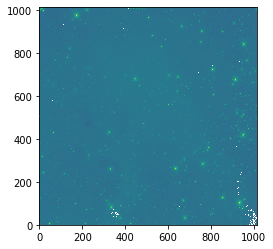

In [44]:
# use this image to test out the wcs
image_index = 7
# show the image
hdulist = fits.open(datapath / hdr0.loc[image_index]['filename'])
img = hdulist[1].data
hdulist.close()

fig, ax = plt.subplots()
ax.imshow(img, origin='lower', norm=mpl.colors.LogNorm())

In [45]:
RA = hdr0.loc[image_index, 'ra_targ']
Dec = hdr0.loc[image_index, 'dec_targ']

# Bajaj alignment tutorial
https://spacetelescope.github.io/notebooks/notebooks/DrizzlePac/align_to_catalogs/align_to_catalogs.html

In [46]:
import astropy.units as u
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

from astropy.io import fits
from astropy.table import Table
from astropy.units import Quantity
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astroquery.mast import Observations
from astroquery.sdss import SDSS

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [54]:
# from ccdproc import ImageFileCollection
from IPython.display import Image

from drizzlepac import tweakreg
from drizzlepac import astrodrizzle

The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


In [55]:
tweakreg.TweakReg?

Signature:
tweakreg.TweakReg(
    files=None,
    editpars=False,
    configobj=None,
    imagefindcfg=None,
    refimagefindcfg=None,
    **input_dict,
)
Docstring:
Tweakreg provides an automated interface for computing residual shifts
between input exposures being combined using ``AstroDrizzle``. The offsets
computed by Tweakreg correspond to pointing differences after applying the WCS
information from the input image's headers.  Such errors would, for example,
be due to errors in guide-star positions when combining observations from
different observing visits or from slight offsets introduced upon re-acquiring
the guide stars in a slightly different position.

Parameters
----------
file : str or list of str  (Default = ``'*flt.fits'``)
    Input files (passed in from *files* parameter)
    This paramater can be provided in any of several forms:

     - filename of a single image
     - filename of an association (ASN)table
     - wild-card specification for files in directory (using

In [48]:
coord = SkyCoord(ra=RA, dec=Dec, unit=(u.deg, u.deg))
radius = Quantity(6, u.arcmin)

In [49]:
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (160.97672125, -59.57321944)>

In [50]:
gaia_query = Gaia.query_object_async(coordinate=coord, radius=radius)
gaia_query

INFO: Query finished. [astroquery.utils.tap.core]


solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object,float64
1635721458409799680,Gaia DR2 5350363772817948544,5350363772817948544,740551872,2015.5,160.97705997676036,1.4448730676921966,-59.57326864900471,1.156587877897104,--,--,--,--,--,--,--,-0.3300376,--,--,--,--,--,--,--,--,--,142,0,142,0,49.07679,3607.061,8.879084375737943,179.52513299218103,3,False,0.0117318025,--,--,0.03486028,18,13,2.6670434,0,18,False,160,565.8936780859615,9.506146571408493,59.52924,18.806528,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,--,--,0,--,--,--,NOT_AVAILABLE,287.41618762389015,-0.5993919379631182,201.80480429264867,-58.957569349653575,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+5350363772817948544,,0.00017057287262777225
1635721458409799680,Gaia DR2 5350363768497169408,5350363768497169408,925024514,2015.5,160.97647790569883,0.13016472478075541,-59.57256301764913,0.12045652387155646,0.054728558330726866,0.14744260827781067,0.3711855,-8.32427808308927,0.25170266360115157,3.347685022888048,0.22805532986104987,-0.14465477,-0.06274974,-0.21891822,0.2430961,0.089830115,0.24409385,-0.04505707,0.25101006,0.090878054,-0.22893591,211,0,199,12,10.075676,466.64255,0.88143080712544,11.689825831355574,31,False,0.7041318,1.516547618164375,0.034897671279398974,-0.08583066,23

In [51]:
reduced_query = gaia_query['ra', 'dec', 'phot_g_mean_mag']
reduced_query

ra,dec,phot_g_mean_mag
deg,deg,mag
float64,float64,float32
160.97705997676036,-59.57326864900471,18.806528
160.97647790569883,-59.57256301764913,17.31339
160.9787358735942,-59.572055711529416,18.875387
160.9777369114546,-59.57155750047578,17.38414
160.97448819784378,-59.574648647952266,16.827835
160.98051626061994,-59.57312183190818,18.553568
160.9791634064007,-59.575137952265635,18.428423
160.97347979509692,-59.57149862748529,18.956295


In [52]:
reduced_query.write('gaia.cat', format='ascii.commented_header', 
                    overwrite=True)

In [53]:
refcat = 'gaia.cat'
cw = 3.5  # Set to two times the FWHM of the PSF.
wcsname = 'Gaia'  # Specify the WCS name for this alignment

tweakreg.TweakReg([(datapath / hdr0.loc[image_index]['filename']).as_posix()],#'*flc.fits',  # Pass input images
                  updatehdr=False,  # update header with new WCS solution
                  imagefindcfg={'threshold':500.,'conv_width':cw},  # Detection parameters, threshold varies for different data
                  refcat=refcat,  # Use user supplied catalog (Gaia)
                  interactive=False,
                  see2dplot=False,
                  shiftfile=True,  # Save out shift file (so we can look at shifts later)
                  outshifts='Gaia_shifts.txt',  # name of the shift file
                  wcsname=wcsname,  # Give our WCS a new name
                  reusename=True,
                  sigma=2.3,
                  ylimit=0.2,
                  fitgeometry='general')  # Use the 6 parameter fit



NameError: name 'tweakreg' is not defined